#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [1]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [3]:
X = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9],
                  [2,3,4]])
Y=torch.tensor([[0,1,2],
                [5,6,3],
                [2,6,7],
                [7,2,10]])
###행으로 병합 코드
output1 = torch.cat([X,Y], dim = 0)
###열로 병합 코드
output2 = torch.cat([X,Y],dim =1)

print(output1)
print(output2)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [ 2,  3,  4],
        [ 0,  1,  2],
        [ 5,  6,  3],
        [ 2,  6,  7],
        [ 7,  2, 10]])
tensor([[ 1,  2,  3,  0,  1,  2],
        [ 4,  5,  6,  5,  6,  3],
        [ 7,  8,  9,  2,  6,  7],
        [ 2,  3,  4,  7,  2, 10]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [ ]:
!pip install d2l

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [3]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.4061,  0.1437]) 
label: tensor([4.0727])


In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
        ##이하는 반복문에 대한 조건입니다.
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [5]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.7367,  0.2898],
        [-0.3319,  0.9528],
        [-0.2601, -0.5311],
        [ 0.3966,  0.4230],
        [ 0.2891, -0.2734],
        [-0.8328,  0.1118],
        [-0.4511, -1.4330],
        [-0.7865,  0.1385],
        [-0.9803, -1.3475],
        [-0.5724,  0.1755],
        [-1.4094, -0.3518],
        [-1.2600,  0.5037],
        [ 0.3881, -0.9516],
        [ 0.3214, -0.2695],
        [-0.6780, -0.7358],
        [-0.5327, -1.1342],
        [-1.8078, -1.1510],
        [-0.4346,  0.9566],
        [ 0.8073, -1.8032],
        [ 0.5269, -0.8480]]) 
 tensor([[10.2664],
        [ 3.0686],
        [ 5.5254],
        [ 6.0619],
        [ 6.7774],
        [ 2.8209],
        [ 6.2769],
        [ 2.9459],
        [ 4.5757],
        [ 3.5189],
        [ 1.8058],
        [ 0.9615],
        [ 8.0934],
        [ 6.8737],
        [ 4.5783],
        [ 5.6016],
        [ 1.8078],
        [ 2.7636],
        [10.6278],
        [ 8.3551]])


In [30]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [15]:
w

tensor([[-0.0011],
        [ 0.0046]], requires_grad=True)

In [7]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w) + b

In [8]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [10]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        ###반복문으로 채워넣기
        for param in params:
          param -= lr*param.grad/batch_size
          param.grad.zero_()

In [31]:
lr = 0.04
num_epochs = 50
net = linreg
loss = squared_loss

w_l= []
b_l = []
loss_l = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w,b], lr, batch_size)

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        temp_l = loss(net(features, w, b = torch.zeros(1, requires_grad=True)), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


        #epoch이 끝날때마다 가중치, loss 값 저장
        w_l.append(w.tolist())
        b_l.append(b)
        loss_l.append(temp_l.mean())


epoch 1, loss 0.006115
epoch 2, loss 0.000051
epoch 3, loss 0.000049
epoch 4, loss 0.000049
epoch 5, loss 0.000049
epoch 6, loss 0.000049
epoch 7, loss 0.000049
epoch 8, loss 0.000049
epoch 9, loss 0.000049
epoch 10, loss 0.000049
epoch 11, loss 0.000049
epoch 12, loss 0.000049
epoch 13, loss 0.000049
epoch 14, loss 0.000049
epoch 15, loss 0.000049
epoch 16, loss 0.000049
epoch 17, loss 0.000049
epoch 18, loss 0.000049
epoch 19, loss 0.000049
epoch 20, loss 0.000049
epoch 21, loss 0.000049
epoch 22, loss 0.000049
epoch 23, loss 0.000049
epoch 24, loss 0.000049
epoch 25, loss 0.000049
epoch 26, loss 0.000049
epoch 27, loss 0.000049
epoch 28, loss 0.000049
epoch 29, loss 0.000049
epoch 30, loss 0.000049
epoch 31, loss 0.000049
epoch 32, loss 0.000049
epoch 33, loss 0.000049
epoch 34, loss 0.000049
epoch 35, loss 0.000049
epoch 36, loss 0.000049
epoch 37, loss 0.000049
epoch 38, loss 0.000049
epoch 39, loss 0.000049
epoch 40, loss 0.000049
epoch 41, loss 0.000049
epoch 42, loss 0.000049
e

In [12]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([0.0004, 0.0001], grad_fn=<SubBackward0>)
error in estimating b: tensor([-7.3910e-05], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [45]:
np.array(w_l).reshape(50,2)[:,0]

array([2.94973421, 2.99842787, 2.99959469, 2.99967003, 2.99949265,
       2.99952197, 2.99991584, 2.99948168, 2.99975586, 2.99938726,
       2.99988031, 2.99952269, 2.99952316, 2.99959373, 2.99945664,
       2.99935865, 2.99984074, 2.99947286, 2.9997077 , 2.99930024,
       2.99947476, 2.99987054, 2.999722  , 3.00004721, 2.99976707,
       2.99987698, 2.9999609 , 2.99962068, 2.99963236, 2.99983978,
       2.99960446, 2.99960971, 2.99958777, 2.99933505, 2.99983501,
       2.99982738, 2.99983668, 2.99943423, 2.99971318, 2.99979019,
       2.99948382, 2.99964523, 3.00013757, 2.99947238, 2.99946141,
       2.99982309, 2.99977112, 2.99966764, 2.99979448, 2.99961066])

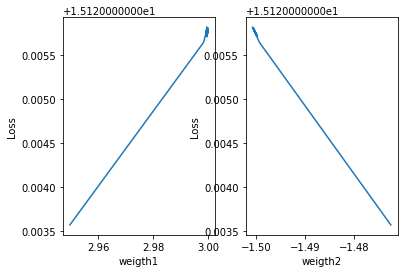

In [46]:
import numpy as np
import matplotlib.pyplot as plt

w1 = np.array(w_l).reshape(50,2)[:,0]
w2 = np.array(w_l).reshape(50,2)[:,1]

plt.subplot(1,2,1)
plt.plot(w1, loss_l)
plt.ylabel("Loss")
plt.xlabel("weigth1")

plt.subplot(1,2,2)
plt.plot(w2, loss_l)
plt.ylabel("Loss")
plt.xlabel("weigth2")
plt.show()

concise implementation of linear regression 
- api 사용해보기

In [47]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [48]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [49]:
next(iter(data_iter))

[tensor([[ 0.6138, -0.2445],
         [ 0.7003, -2.1290],
         [-0.0569,  1.1512],
         [ 1.6780, -0.1858],
         [ 0.3292,  0.4797],
         [-0.3438, -1.1981],
         [ 1.7641, -2.3961],
         [ 0.7390, -1.1260],
         [ 0.6395, -0.4764],
         [-2.0336, -2.9384],
         [ 0.0749,  0.2898],
         [ 0.8838, -0.2573],
         [-0.7664,  0.3305],
         [-0.9737, -0.8967],
         [-1.2874, -0.4003],
         [ 0.2137, -0.4425],
         [-0.2436, -0.3715],
         [-1.0796, -0.3916],
         [ 0.1052,  2.9390],
         [-0.6083, -1.4698]]), tensor([[ 7.7016],
         [10.7999],
         [ 3.6147],
         [10.7849],
         [ 5.7628],
         [ 6.2703],
         [14.3787],
         [ 9.4117],
         [ 8.1317],
         [ 3.7961],
         [ 5.2839],
         [ 8.5351],
         [ 2.6978],
         [ 3.9343],
         [ 2.2390],
         [ 6.8122],
         [ 5.3288],
         [ 2.8598],
         [ 1.4147],
         [ 5.8892]])]

In [51]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [52]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [53]:
loss = nn.MSELoss()

In [54]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.04)

In [55]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000098
epoch 2, loss 0.000097
epoch 3, loss 0.000096


In [56]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-2.0528e-04, -7.7605e-05])
error in estimating b: tensor([4.0531e-05])
